<a href="https://colab.research.google.com/github/alyhussein86/UuDPKFJtzKKQUHG6/blob/main/Potential_talents_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

In [1]:
pip install transformers

In [2]:
pip install gensim

In [3]:
pip install sentence_transformers

## Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
# from sklearn.decomposition import PCA
from transformers import BertTokenizer, BertModel, AutoTokenizer, AutoModel
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.phrases import Phrases, Phraser
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity
import lightgbm as lgb

## Importing the dataset

In [5]:
dataset = pd.read_csv('potential-talents - Aspiring human resources - seeking human resources.csv')
X = dataset.iloc[:, :-1]

In [6]:
print(X.shape)
print(X.dtypes)

(104, 4)
id             int64
job_title     object
location      object
connection    object
dtype: object


## Histograming

<Axes: title={'center': 'Connections'}, ylabel='Frequency'>

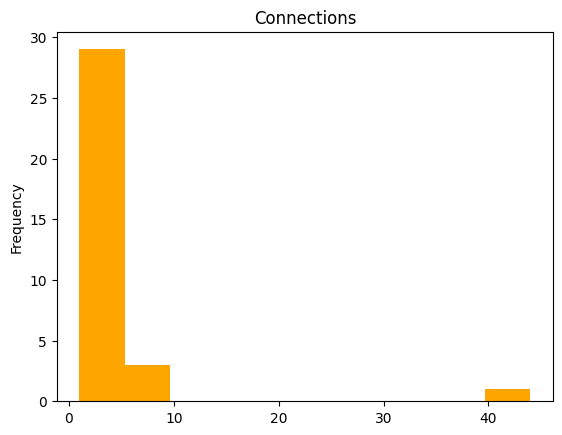

In [7]:
X['connection'].value_counts().plot(kind='hist',color="orange", title= 'Connections')

<Axes: title={'center': 'Location'}, ylabel='Frequency'>

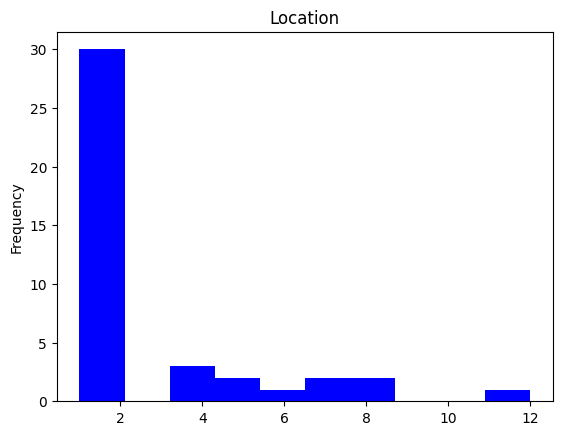

In [8]:
X['location'].value_counts().plot(kind='hist',color="blue", title= 'Location')

<Axes: title={'center': 'Job_Title'}, ylabel='Frequency'>

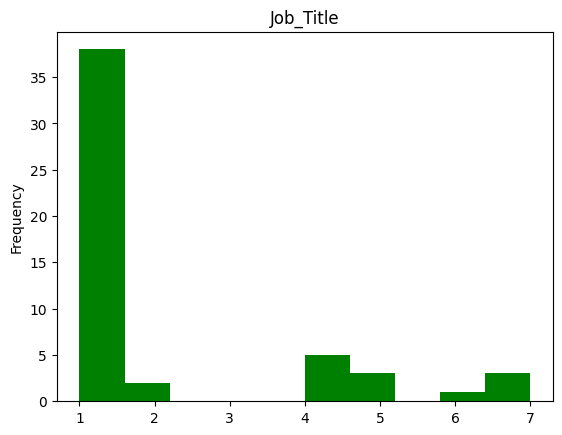

In [9]:
X['job_title'].value_counts().plot(kind='hist', color="green", xlabel= 'related sentences', title= 'Job_Title')

## Encoding categorical data

### Converting connection Column into Integer

In [10]:
X['connection']= X['connection'].str.rstrip('+ ')
X['connection'] = X['connection'].astype('Int64')
print(X['connection'].describe)

<bound method NDFrame.describe of 0       85
1      500
2       44
3      500
4      500
      ... 
99     103
100    500
101     49
102    500
103    500
Name: connection, Length: 104, dtype: Int64>


In [11]:
X['embedding_Score'] = 0
X['similarity_BERT'] = 0

In [12]:
print(X, X.describe)

      id                                          job_title  \
0      1  2019 C.T. Bauer College of Business Graduate (...   
1      2  Native English Teacher at EPIK (English Progra...   
2      3              Aspiring Human Resources Professional   
3      4             People Development Coordinator at Ryan   
4      5    Advisory Board Member at Celal Bayar University   
..   ...                                                ...   
99   100  Aspiring Human Resources Manager | Graduating ...   
100  101              Human Resources Generalist at Loparex   
101  102   Business Intelligence and Analytics at Travelers   
102  103                     Always set them up for Success   
103  104   Director Of Administration at Excellence Logging   

                                location  connection  embedding_Score  \
0                         Houston, Texas          85                0   
1                                 Kanada         500                0   
2    Raleigh-Durham, Nor

### Tokenization and Word Embedding

## Using BERT

In [13]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Encode the sentences
embeddings = model.encode(X['job_title']).tolist()

In [14]:
embeding_score = []

for e in range(0, len(embeddings)-1):
    embeding_score.append(embeddings)
    X['embedding_Score'] = embeding_score[e]

print(X['embedding_Score'])

0      [-0.8347963094711304, 0.7061929106712341, 1.41...
1      [-1.104153037071228, 0.6818210482597351, 0.480...
2      [0.46927931904792786, 0.28294771909713745, 2.3...
3      [-0.6027138829231262, -0.19602417945861816, 1....
4      [-0.0554780475795269, -0.19447144865989685, 1....
                             ...                        
99     [-0.5095099806785583, 0.2794764041900635, 1.60...
100    [0.27189886569976807, 0.0620465949177742, 1.32...
101    [-0.5368142127990723, 0.6071471571922302, 1.69...
102    [0.12111373245716095, -0.07036970555782318, 2....
103    [-0.9533588290214539, 0.9029397964477539, 1.01...
Name: embedding_Score, Length: 104, dtype: object


In [15]:

X['sentence1'] = "aspiring human resources"
X['sentence2'] = "seeking human resources"
embeddings1 = model.encode(X['sentence1']).tolist()
embeddings2 = model.encode(X['sentence2']).tolist()
# print(len(embeddings1))

In [16]:
embeding_score1 = []
embeding_score2 = []

for j in range(0, len(X['sentence1'])-1):
    embeding_score1.append(embeddings1)
    X['embedding_Score1'] = embeding_score1[j]

for em in range(0, len(X['sentence2'])-1):
    embeding_score2.append(embeddings2)
    X['embedding_Score2'] = embeding_score2[em]


print(X)

      id                                          job_title  \
0      1  2019 C.T. Bauer College of Business Graduate (...   
1      2  Native English Teacher at EPIK (English Progra...   
2      3              Aspiring Human Resources Professional   
3      4             People Development Coordinator at Ryan   
4      5    Advisory Board Member at Celal Bayar University   
..   ...                                                ...   
99   100  Aspiring Human Resources Manager | Graduating ...   
100  101              Human Resources Generalist at Loparex   
101  102   Business Intelligence and Analytics at Travelers   
102  103                     Always set them up for Success   
103  104   Director Of Administration at Excellence Logging   

                                location  connection  \
0                         Houston, Texas          85   
1                                 Kanada         500   
2    Raleigh-Durham, North Carolina Area          44   
3                  

## Calculating Cosine Similarity for BERT

In [17]:
cosine_similarities = []

for i in range (len(X['embedding_Score'])):
    similarity = cosine_similarity([X['embedding_Score1'][i]],[X['embedding_Score'][i]])[0][0]
    cosine_similarities.append(similarity)
    X['similarity_BERT'][i] = cosine_similarities[i]

<ipython-input-17-f3d5f0b01939>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['similarity_BERT'][i] = cosine_similarities[i]


In [18]:
print(X['similarity_BERT'])

0      0.497849
1      0.372279
2      0.927214
3      0.705831
4      0.463202
         ...   
99     0.500861
100    0.609300
101    0.455116
102    0.618959
103    0.488342
Name: similarity_BERT, Length: 104, dtype: float64


In [19]:
X['similarity2_BERT'] = 0
cosine_similarities2 = []

for i in range (len(X['embedding_Score'])):
    similarity2 = cosine_similarity([X['embedding_Score2'][i]],[X['embedding_Score'][i]])[0][0]
    cosine_similarities2.append(similarity2)
    X['similarity2_BERT'][i] = cosine_similarities2[i]

<ipython-input-19-6e25c4da1f9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['similarity2_BERT'][i] = cosine_similarities2[i]


In [20]:
print(X['similarity2_BERT'])

0      0.220571
1      0.324733
2      0.709421
3      0.668772
4      0.468544
         ...   
99     0.241682
100    0.650529
101    0.436132
102    0.488246
103    0.410908
Name: similarity2_BERT, Length: 104, dtype: float64


## Using Word2Vec

In [21]:
X['preprocessed_sentences'] = X['job_title'].apply(lambda x: simple_preprocess(x))

X['preprocessed_sentences1'] = X['sentence1'].apply(lambda x: simple_preprocess(x))

X['preprocessed_sentences2'] = X['sentence2'].apply(lambda x: simple_preprocess(x))


### Encoding Job_title

In [22]:
# Create a list of preprocessed sentences
sentences = X['preprocessed_sentences'].tolist()

# Create bigrams/trigrams to improve word2vec performance
phrases = Phrases(sentences, min_count=5, threshold=10)
bigram = Phraser(phrases)
sentences = list(bigram[sentences])

print(sentences)

# Train the word2vec model
word2vec_model = Word2Vec(sentences, workers=4)

X['embedding_Score_wv'] = 0

# Calculate word2vec embeddings for each sentence
X['embedding_Score_wv'] = sentences
X['embedding_Score_wv'] = X['embedding_Score_wv'].apply(lambda x: [word2vec_model.wv[word] for word in x if word in word2vec_model.wv])

print(X['embedding_Score_wv'])

[['bauer', 'college', 'of', 'business_graduate', 'magna_cum', 'laude', 'and', 'aspiring', 'human', 'resources', 'professional'], ['native', 'english', 'teacher', 'at', 'epik', 'english', 'program', 'in', 'korea'], ['aspiring', 'human', 'resources', 'professional'], ['people_development', 'coordinator', 'at', 'ryan'], ['advisory', 'board', 'member', 'at', 'celal', 'bayar', 'university'], ['aspiring', 'human', 'resources', 'specialist'], ['student', 'at', 'humber', 'college', 'and', 'aspiring', 'human', 'resources', 'generalist'], ['hr', 'senior', 'specialist'], ['student', 'at', 'humber', 'college', 'and', 'aspiring', 'human', 'resources', 'generalist'], ['seeking', 'human', 'resources', 'hris', 'and', 'generalist', 'positions'], ['student', 'at', 'chapman', 'university'], ['svp', 'chro', 'marketing', 'communications', 'csr', 'officer', 'engie', 'houston', 'the', 'woodlands', 'energy', 'gphr', 'sphr'], ['human', 'resources', 'coordinator', 'at', 'buckhead', 'atlanta'], ['bauer', 'colleg

In [23]:
# Create a list of preprocessed sentences
sentences1 = X['preprocessed_sentences1'].tolist()
sentences2 = X['preprocessed_sentences2'].tolist()

# Create bigrams/trigrams to improve word2vec performance
phrases1 = Phrases(sentences1, min_count=5, threshold=10)
bigram1 = Phraser(phrases1)
sentences1 = list(bigram1[sentences1])

phrases2 = Phrases(sentences2, min_count=5, threshold=10)
bigram2 = Phraser(phrases2)
sentences2 = list(bigram2[sentences2])

# Train the word2vec model
word2vec_model1 = Word2Vec(sentences1,  workers=4)
word2vec_model2 = Word2Vec(sentences2,  workers=4)

X['embedding_Score_wv1'] = 0
X['embedding_Score_wv2'] = 0

# Calculate word2vec embeddings for each sentence
X['embedding_Score_wv1'] = sentences1
X['embedding_Score_wv1'] = X['embedding_Score_wv1'].apply(lambda y: [word2vec_model1.wv[word] for word in y if word in word2vec_model1.wv])

X['embedding_Score_wv2'] = sentences2
X['embedding_Score_wv2'] = X['embedding_Score_wv2'].apply(lambda z: [word2vec_model2.wv[word] for word in z if word in word2vec_model2.wv])

## Calculating Cosine Similarity for Word2Vec

In [24]:
X['similarity_WV'] = 0
cosine_similarities_wv = []

for i in range(len(X)):
    try:
        similarity_wv = cosine_similarity(np.mean(X['embedding_Score_wv'][i] ,axis=0).reshape(1,-1)
                                      ,np.mean(X['embedding_Score_wv1'][i] ,axis=0).reshape(1,-1))
        cosine_similarities_wv.append(similarity_wv[0][0])
    except:
        cosine_similarities_wv.append(0)
    X['similarity_WV'][i] = cosine_similarities_wv[i]

<ipython-input-24-c93f11048e2d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['similarity_WV'][i] = cosine_similarities_wv[i]
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [25]:
print(X['similarity_WV'])

0      0.540846
1      0.302231
2      0.550846
3      0.170910
4      0.339880
         ...   
99     0.631050
100    0.873759
101    0.424262
102    0.000000
103    0.439020
Name: similarity_WV, Length: 104, dtype: float64


In [26]:
X['similarity2_WV'] = 0
cosine_similarities2_wv = []

for i in range(len(X)):
    try:
        similarity2_wv = cosine_similarity(np.mean(X['embedding_Score_wv'][i] ,axis=0).reshape(1,-1)
                                      ,np.mean(X['embedding_Score_wv2'][i] ,axis=0).reshape(1,-1))
        cosine_similarities2_wv.append(similarity2_wv[0][0])
    except:
        cosine_similarities2_wv.append(0)
    X['similarity2_WV'][i] = cosine_similarities2_wv[i]

<ipython-input-26-9b3fc5bde74e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['similarity2_WV'][i] = cosine_similarities2_wv[i]
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [27]:
print(X['similarity2_WV'])

0      0.540846
1      0.302231
2      0.550846
3      0.170910
4      0.339880
         ...   
99     0.631050
100    0.873759
101    0.424262
102    0.000000
103    0.439020
Name: similarity2_WV, Length: 104, dtype: float64


In [28]:
# print(X['similarity_WV'].dtype)
np.array(X['similarity_BERT']).reshape(1,-1)

array([[0.49784945, 0.3722793 , 0.92721359, 0.70583113, 0.46320153,
        0.94260956, 0.72150864, 0.68061271, 0.72150864, 0.76440682,
        0.44876228, 0.29949858, 0.39719843, 0.49784945, 0.49784945,
        0.3722793 , 0.92721359, 0.70583113, 0.49784945, 0.3722793 ,
        0.92721359, 0.70583113, 0.46320153, 0.94260956, 0.72150864,
        0.68061271, 0.67100712, 0.83371314, 0.67100719, 0.83371314,
        0.49784951, 0.3722793 , 0.92721362, 0.70583113, 0.46320153,
        0.94260956, 0.72150864, 0.68061271, 0.72150864, 0.76440682,
        0.44876228, 0.29949858, 0.39719843, 0.49784945, 0.3722793 ,
        0.92721359, 0.70583113, 0.46320153, 0.94260956, 0.72150864,
        0.68061271, 0.72150864, 0.76440682, 0.44876228, 0.29949858,
        0.39719843, 0.49784945, 0.92721359, 0.70583113, 0.94260956,
        0.68061271, 0.76440682, 0.4487622 , 0.29949858, 0.39719843,
        0.70073822, 0.751283  , 0.69538511, 0.44915772, 0.4233802 ,
        0.54158003, 0.65605046, 0.7402717 , 0.78

In [29]:
X.describe()

,id,connection,similarity_BERT,similarity2_BERT,similarity_WV,similarity2_WV
count,104.000000,104.0,104.000000,104.000000,104.000000,104.000000
mean,52.500000,262.663462,0.602627,0.509674,0.463935,0.463935
std,30.166206,222.602812,0.196812,0.200508,0.247328,0.247328
min,1.000000,1.0,0.086293,0.025089,-0.010583,-0.010583
25%,26.750000,47.0,0.453627,0.345870,0.275294,0.275294
50%,52.500000,193.0,0.623629,0.522866,0.540846,0.540846
75%,78.250000,500.0,0.721509,0.673689,0.631143,0.631143
max,104.000000,500.0,0.942610,0.969809,0.999089,0.999089


In [30]:
print(X)

      id                                          job_title  \
0      1  2019 C.T. Bauer College of Business Graduate (...   
1      2  Native English Teacher at EPIK (English Progra...   
2      3              Aspiring Human Resources Professional   
3      4             People Development Coordinator at Ryan   
4      5    Advisory Board Member at Celal Bayar University   
..   ...                                                ...   
99   100  Aspiring Human Resources Manager | Graduating ...   
100  101              Human Resources Generalist at Loparex   
101  102   Business Intelligence and Analytics at Travelers   
102  103                     Always set them up for Success   
103  104   Director Of Administration at Excellence Logging   

                                location  connection  \
0                         Houston, Texas          85   
1                                 Kanada         500   
2    Raleigh-Durham, North Carolina Area          44   
3                  

## Calculating Rank based on Word2Vec similarity as it has the highest MAX

### MinMaxScaler for Connection

In [31]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Perform min-max scaling
data_scale = np.array(X['connection'])
X['Connection_Score'] = scaler.fit(data_scale.reshape(-1, 1))

# Scale the data
X['Connection_Score'] = scaler.transform(data_scale.reshape(-1, 1))

print(X['Connection_Score'])

0      0.168337
1      1.000000
2      0.086172
3      1.000000
4      1.000000
         ...   
99     0.204409
100    1.000000
101    0.096192
102    1.000000
103    1.000000
Name: Connection_Score, Length: 104, dtype: float64


### Creating 3 additinal Columns to calculate the higher Scores for Connections and Cosine Similarties

In [32]:
X['Connection_Score_Sim']= X['Connection_Score'] * 0.2

print(X['Connection_Score_Sim'])

0      0.033667
1      0.200000
2      0.017234
3      0.200000
4      0.200000
         ...   
99     0.040882
100    0.200000
101    0.019238
102    0.200000
103    0.200000
Name: Connection_Score_Sim, Length: 104, dtype: float64


In [33]:
X['RANK'] =  X['Connection_Score_Sim'] + X['similarity2_WV']

print(X['RANK'])

0      0.574513
1      0.502231
2      0.568080
3      0.370910
4      0.539880
         ...   
99     0.671932
100    1.073759
101    0.443501
102    0.200000
103    0.639020
Name: RANK, Length: 104, dtype: float64


In [34]:
print(X)

      id                                          job_title  \
0      1  2019 C.T. Bauer College of Business Graduate (...   
1      2  Native English Teacher at EPIK (English Progra...   
2      3              Aspiring Human Resources Professional   
3      4             People Development Coordinator at Ryan   
4      5    Advisory Board Member at Celal Bayar University   
..   ...                                                ...   
99   100  Aspiring Human Resources Manager | Graduating ...   
100  101              Human Resources Generalist at Loparex   
101  102   Business Intelligence and Analytics at Travelers   
102  103                     Always set them up for Success   
103  104   Director Of Administration at Excellence Logging   

                                location  connection  \
0                         Houston, Texas          85   
1                                 Kanada         500   
2    Raleigh-Durham, North Carolina Area          44   
3                  

## Sorting based on Rank column

In [35]:
# Sort DataFrame based on the 'age' column
X= X.sort_values('RANK', ascending = False)

# Print the sorted DataFrame
print(X.head(20))

      id                                          job_title  \
88    89                    Director Human Resources  at EY   
67    68            Human Resources Specialist at Luxottica   
77    78             Human Resources Generalist at Schwan's   
100  101              Human Resources Generalist at Loparex   
70    71    Human Resources Generalist at ScottMadden, Inc.   
12    13  Human Resources Coordinator at InterContinenta...   
64    65  Human Resources Coordinator at InterContinenta...   
42    43  Human Resources Coordinator at InterContinenta...   
55    56  Human Resources Coordinator at InterContinenta...   
80    81  Senior Human Resources Business Partner at Hei...   
68    69  Director of Human Resources North America, Gro...   
74    75  Nortia Staffing is seeking Human Resources, Pa...   
27    28              Seeking Human Resources Opportunities   
29    30              Seeking Human Resources Opportunities   
52    53  Seeking Human Resources HRIS and Generalist P

In [36]:
X['TargetRank'] = 0

top_count = 5

X.loc[:top_count - 1, 'TargetRank'] = 1

print(X['TargetRank'])

88     1
67     1
77     1
100    1
70     1
      ..
85     0
86     0
97     0
79     0
91     0
Name: TargetRank, Length: 104, dtype: int64


In [37]:
y = X['TargetRank']


In [38]:
X = X.iloc[:, 1:-1]

In [39]:
print(X)

                                             job_title  \
88                     Director Human Resources  at EY   
67             Human Resources Specialist at Luxottica   
100              Human Resources Generalist at Loparex   
77              Human Resources Generalist at Schwan's   
70     Human Resources Generalist at ScottMadden, Inc.   
..                                                 ...   
85   Information Systems Specialist and Programmer ...   
86   Bachelor of Science in Biology from Victoria U...   
97                                             Student   
79            Junior MES Engineer| Information Systems   
91   Seeking employment opportunities within Custom...   

                                location  connection  \
88                  Greater Atlanta Area         349   
67            Greater New York City Area         500   
100  Raleigh-Durham, North Carolina Area         500   
77           Amerika Birleşik Devletleri         500   
70   Raleigh-Durham, No

In [39]:
# selecting integer and float datatypes in the dataset
X_number = X.select_dtypes(include='number')

print(X_number)

     connection  similarity_BERT  similarity2_BERT  similarity_WV  \
88          349         0.703597          0.706972       0.999089   
67          500         0.695385          0.712857       0.891461   
77          500         0.538165          0.592856       0.873759   
100         500         0.609300          0.650529       0.873759   
70          500         0.541580          0.513893       0.873759   
..          ...              ...               ...            ...   
85            4         0.509713          0.514142       0.158359   
86           40         0.086293          0.025089       0.077603   
97            4         0.654689          0.588232       0.034504   
79           52         0.565178          0.376344       0.000000   
91           64         0.628300          0.694014      -0.010583   

     similarity2_WV  Connection_Score  Connection_Score_Sim      RANK  
88         0.999089          0.697395              0.139479  1.138568  
67         0.891461        

In [41]:
# Converting the dataset to float datatype as preparing for Training
X_number = X_number.astype(float)
columns_to_drop = ['connection', 'RANK', 'Connection_Score_Sim','similarity_WV', 'similarity_BERT']
X_number = X_number.drop(columns_to_drop, axis=1)
print(X_number.dtypes)
print(X_number)

similarity2_BERT    float64
similarity2_WV      float64
Connection_Score    float64
dtype: object
     similarity2_BERT  similarity2_WV  Connection_Score
88           0.706972        0.999089          0.697395
67           0.712857        0.891461          1.000000
77           0.592856        0.873759          1.000000
100          0.650529        0.873759          1.000000
70           0.513893        0.873759          1.000000
..                ...             ...               ...
85           0.514142        0.158359          0.006012
86           0.025089        0.077603          0.078156
97           0.588232        0.034504          0.006012
79           0.376344        0.000000          0.102204
91           0.694014       -0.010583          0.126253

[104 rows x 3 columns]


## Splitting the dataset into the Training set and Test set

In [42]:
X_train, X_test, y_train, y_test= train_test_split(X_number,y, test_size = 0.2, random_state = 0)

In [43]:
print(X_train)

     similarity2_BERT  similarity2_WV  Connection_Score
15           0.324733        0.302231          1.000000
100          0.650529        0.873759          1.000000
101          0.436132        0.424262          0.096192
95           0.126020        0.339475          0.036072
33           0.668772        0.170910          1.000000
..                ...             ...               ...
86           0.025089        0.077603          0.078156
1            0.324733        0.302231          1.000000
34           0.468544        0.339880          1.000000
13           0.220571        0.540846          0.168337
76           0.611587        0.417345          0.817635

[83 rows x 3 columns]


In [44]:
print(X_test)

    similarity2_BERT  similarity2_WV  Connection_Score
36          0.531590        0.658947          0.120240
81          0.597476        0.482831          0.346693
77          0.592856        0.873759          1.000000
47          0.468544        0.339880          1.000000
11          0.266692        0.134636          1.000000
14          0.220571        0.540846          0.168337
39          0.843657        0.604845          1.000000
85          0.514142        0.158359          0.006012
32          0.709421        0.550846          0.086172
96          0.709421        0.550846          0.140281
65          0.486818        0.487325          0.112224
60          0.537119        0.013756          1.000000
0           0.220571        0.540846          0.168337
29          0.969809        0.667911          0.779559
42          0.345870        0.852381          1.000000
73          0.795009        0.663796          0.030060
51          0.531590        0.658947          0.120240
38        

In [45]:
print(y_train)

15     0
100    1
101    0
95     0
33     0
      ..
86     0
1      0
34     1
13     1
76     1
Name: TargetRank, Length: 83, dtype: int64


In [46]:
query_train = [X_train.shape[0]]
query_val = [y_train.shape[0]]
query_test = [X_test.shape[0]]

## LightGBM Ranking modelling

In [47]:
gbm = lgb.LGBMRanker(boosting_type='gbdt', num_leaves=31,
                     max_depth= -1,n_jobs=-1)

In [48]:
gbm.fit(X_train, y_train, group=query_train,
        eval_set=[(X_train, y_train)], eval_group=[query_val],
        eval_at=[5, 10, 20], early_stopping_rounds=50)

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's ndcg@5: 1	training's ndcg@10: 1	training's ndcg@20: 1
[2]	training's ndcg@5: 1	training's ndcg@10: 1	training's ndcg@20: 1
[3]	training's ndcg@5: 1	training's ndcg@10: 1	training's ndcg@20: 1
[4]	training's ndcg@5: 1	training's ndcg@10: 1	training's ndcg@20: 1
[5]	training's ndcg@5: 1	training's ndcg@10: 1	training's ndcg@20: 1
[6]	training's ndcg@5: 1	training's ndcg@10: 1	training's ndcg@20: 1
[7]	training's ndcg@5: 1	training's ndcg@10: 1	training's ndcg@20: 1
[8]	training's ndcg@5: 1	training's ndcg@10: 1	training's ndcg@20: 1
[9]	training's ndcg@5: 1	training's ndcg@10: 1	training's ndcg@20: 1
[10]	training's ndcg@5: 1	training's ndcg@10: 1	training's ndcg@20: 1
[11]	training's ndcg@5: 1	training's ndcg@10: 1	training's ndcg@20: 1
[12]	training's ndcg@5: 1	training's ndcg@10: 1	training's ndcg@20: 1
[13]	training's ndcg@5: 1	training's ndcg@10: 1	training's ndcg@20: 1
[14]	training's ndcg@5: 1	training's ndcg@10: 1	training's ndcg@20: 1
[15]	training's ndcg@5: 1	tra

LGBMRanker()

In [49]:
test_pred = gbm.predict(X_test)

In [50]:
print(test_pred)

[ 0.2         0.2         0.2        -0.15849643 -0.15849643  0.2
  0.2        -0.15849643  0.2         0.2         0.2        -0.15849643
  0.2         0.2         0.2         0.2         0.2         0.2
 -0.15849643  0.2         0.2       ]


In [51]:
X_test["predicted_ranking"] = test_pred
X_test.sort_values("predicted_ranking", ascending=False)

print(X_test["predicted_ranking"])

36    0.200000
81    0.200000
77    0.200000
47   -0.158496
11   -0.158496
14    0.200000
39    0.200000
85   -0.158496
32    0.200000
96    0.200000
65    0.200000
60   -0.158496
0     0.200000
29    0.200000
42    0.200000
73    0.200000
51    0.200000
38    0.200000
26   -0.158496
55    0.200000
83    0.200000
Name: predicted_ranking, dtype: float64


In [52]:
print(X_test)

    similarity2_BERT  similarity2_WV  Connection_Score  predicted_ranking
36          0.531590        0.658947          0.120240           0.200000
81          0.597476        0.482831          0.346693           0.200000
77          0.592856        0.873759          1.000000           0.200000
47          0.468544        0.339880          1.000000          -0.158496
11          0.266692        0.134636          1.000000          -0.158496
14          0.220571        0.540846          0.168337           0.200000
39          0.843657        0.604845          1.000000           0.200000
85          0.514142        0.158359          0.006012          -0.158496
32          0.709421        0.550846          0.086172           0.200000
96          0.709421        0.550846          0.140281           0.200000
65          0.486818        0.487325          0.112224           0.200000
60          0.537119        0.013756          1.000000          -0.158496
0           0.220571        0.540846  